# 元データ読み込み

In [1]:
import pandas as pd
import numpy as np
import datetime
df_sannomiya_hokosha = pd.read_csv('sannomiya_hokosha_data.csv', encoding='utf_8_sig', parse_dates=['日時', '日付'])
df_sannomiya_hokosha['月'] = df_sannomiya_hokosha['日時'].apply(lambda x: x.month)
df_sannomiya_hokosha['日'] = df_sannomiya_hokosha['日時'].apply(lambda x: x.day)
df_sannomiya_hokosha['時刻'] = df_sannomiya_hokosha['時刻'].apply(lambda x: int(x.split(':')[0]))
df_sannomiya_hokosha
df_sannomiya_hokosha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74496 entries, 0 to 74495
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   測定箇所    74496 non-null  int64         
 1   日時      74496 non-null  datetime64[ns]
 2   緯度      74496 non-null  float64       
 3   経度      74496 non-null  float64       
 4   歩行者数    71135 non-null  float64       
 5   稼働      74496 non-null  int64         
 6   測定箇所名称  74496 non-null  object        
 7   日付      74496 non-null  datetime64[ns]
 8   曜日      74496 non-null  int64         
 9   時刻      74496 non-null  int64         
 10  月       74496 non-null  int64         
 11  日       74496 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(6), object(1)
memory usage: 6.8+ MB


In [2]:
df_sannomiya_hokosha.head()

,測定箇所,日時,緯度,経度,歩行者数,稼働,測定箇所名称,日付,曜日,時刻,月,日
0,111,2020-02-01 00:00:00,34.692226,135.194623,36.0,1,センター街1丁目 東端出入口,2020-02-01,7,0,2,1
1,111,2020-02-01 01:00:00,34.692226,135.194623,36.0,1,センター街1丁目 東端出入口,2020-02-01,7,1,2,1
2,111,2020-02-01 02:00:00,34.692226,135.194623,8.0,1,センター街1丁目 東端出入口,2020-02-01,7,2,2,1
3,111,2020-02-01 03:00:00,34.692226,135.194623,20.0,1,センター街1丁目 東端出入口,2020-02-01,7,3,2,1
4,111,2020-02-01 04:00:00,34.692226,135.194623,20.0,1,センター街1丁目 東端出入口,2020-02-01,7,4,2,1


In [3]:
df_sannomiya_hokosha['測定箇所名称'].value_counts()

測定箇所名称
センター街1丁目　東端出入口      8280
フラワーロード西岸　マルイ前      8280
センター街2丁目西端          8280
鯉川筋　元町駅南            8280
サンセット通　阪急西口         8280
JRサンシティ歩道橋上２F       8280
仲町通両岸               8280
いくたロード　生田神社一の鳥居前    8280
旧そごう前デッキ            8256
Name: count, dtype: int64

In [4]:
place_to_num = dict(zip(list(df_sannomiya_hokosha['測定箇所名称'].unique()), [i for i in range(12)]))
place_to_num

{'センター街1丁目\u3000東端出入口': 0,
 'フラワーロード西岸\u3000マルイ前': 1,
 'センター街2丁目西端': 2,
 '鯉川筋\u3000元町駅南': 3,
 'サンセット通\u3000阪急西口': 4,
 'JRサンシティ歩道橋上２F': 5,
 '旧そごう前デッキ': 6,
 '仲町通両岸': 7,
 'いくたロード\u3000生田神社一の鳥居前': 8}

In [5]:
tmp_dict = dict()
for idx, row in df_sannomiya_hokosha.iterrows():
    date = row['日時']
    place = row['測定箇所名称']
    place_num = place_to_num[place]
    num_people = row['歩行者数']
    if date not in tmp_dict:
        tmp_dict[date] = [np.nan for i in range(9)]
    tmp_dict[date][place_num] = num_people
    
tmp_dict

{Timestamp('2020-02-01 00:00:00'): [36.0,
  380.0,
  58.0,
  259.0,
  1176.0,
  7.0,
  134.0,
  nan,
  38.0],
 Timestamp('2020-02-01 01:00:00'): [36.0,
  132.0,
  35.0,
  112.0,
  288.0,
  0.0,
  18.0,
  nan,
  24.0],
 Timestamp('2020-02-01 02:00:00'): [8.0,
  66.0,
  14.0,
  40.0,
  218.0,
  0.0,
  6.0,
  nan,
  24.0],
 Timestamp('2020-02-01 03:00:00'): [20.0,
  80.0,
  16.0,
  60.0,
  272.0,
  0.0,
  2.0,
  nan,
  22.0],
 Timestamp('2020-02-01 04:00:00'): [20.0,
  56.0,
  30.0,
  59.0,
  238.0,
  0.0,
  10.0,
  nan,
  8.0],
 Timestamp('2020-02-01 05:00:00'): [42.0,
  175.0,
  42.0,
  148.0,
  350.0,
  13.0,
  100.0,
  nan,
  26.0],
 Timestamp('2020-02-01 06:00:00'): [74.0,
  196.0,
  58.0,
  250.0,
  196.0,
  15.0,
  164.0,
  nan,
  56.0],
 Timestamp('2020-02-01 07:00:00'): [92.0,
  441.0,
  126.0,
  617.0,
  260.0,
  58.0,
  318.0,
  nan,
  118.0],
 Timestamp('2020-02-01 08:00:00'): [312.0,
  839.0,
  286.0,
  1800.0,
  340.0,
  148.0,
  860.0,
  nan,
  444.0],
 Timestamp('2020-02-0

In [6]:
new_table_dict = dict(zip([j for j in range(10)], [[] for i in range(10)]))
new_table_dict

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [7]:
for k, v in tmp_dict.items():
    new_table_dict[0].append(k)
    for i in range(9):
        new_table_dict[i+1].append(v[i])

In [8]:
new_table_dict

{0: [Timestamp('2020-02-01 00:00:00'),
  Timestamp('2020-02-01 01:00:00'),
  Timestamp('2020-02-01 02:00:00'),
  Timestamp('2020-02-01 03:00:00'),
  Timestamp('2020-02-01 04:00:00'),
  Timestamp('2020-02-01 05:00:00'),
  Timestamp('2020-02-01 06:00:00'),
  Timestamp('2020-02-01 07:00:00'),
  Timestamp('2020-02-01 08:00:00'),
  Timestamp('2020-02-01 09:00:00'),
  Timestamp('2020-02-01 10:00:00'),
  Timestamp('2020-02-01 11:00:00'),
  Timestamp('2020-02-01 12:00:00'),
  Timestamp('2020-02-01 13:00:00'),
  Timestamp('2020-02-01 14:00:00'),
  Timestamp('2020-02-01 15:00:00'),
  Timestamp('2020-02-01 16:00:00'),
  Timestamp('2020-02-01 17:00:00'),
  Timestamp('2020-02-01 18:00:00'),
  Timestamp('2020-02-01 19:00:00'),
  Timestamp('2020-02-01 20:00:00'),
  Timestamp('2020-02-01 21:00:00'),
  Timestamp('2020-02-01 22:00:00'),
  Timestamp('2020-02-01 23:00:00'),
  Timestamp('2020-02-02 00:00:00'),
  Timestamp('2020-02-02 01:00:00'),
  Timestamp('2020-02-02 02:00:00'),
  Timestamp('2020-02-02 0

In [9]:
df_input = pd.DataFrame(new_table_dict)
df_input

,0,1,2,3,4,5,6,7,8,9
0,2020-02-01 00:00:00,36.0,380.0,58.0,259.0,1176.0,7.0,134.0,NaN,38.0
1,2020-02-01 01:00:00,36.0,132.0,35.0,112.0,288.0,0.0,18.0,NaN,24.0
2,2020-02-01 02:00:00,8.0,66.0,14.0,40.0,218.0,0.0,6.0,NaN,24.0
3,2020-02-01 03:00:00,20.0,80.0,16.0,60.0,272.0,0.0,2.0,NaN,22.0
4,2020-02-01 04:00:00,20.0,56.0,30.0,59.0,238.0,0.0,10.0,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...
8275,2021-03-23 19:00:00,1330.0,NaN,1174.0,NaN,NaN,NaN,NaN,NaN,NaN
8276,2021-03-23 20:00:00,776.0,NaN,514.0,NaN,NaN,NaN,NaN,NaN,NaN
8277,2021-03-23 21:00:00,376.0,NaN,206.0,NaN,NaN,NaN,NaN,NaN,NaN
8278,2021-03-23 22:00:00,110.0,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
place_to_num

{'センター街1丁目\u3000東端出入口': 0,
 'フラワーロード西岸\u3000マルイ前': 1,
 'センター街2丁目西端': 2,
 '鯉川筋\u3000元町駅南': 3,
 'サンセット通\u3000阪急西口': 4,
 'JRサンシティ歩道橋上２F': 5,
 '旧そごう前デッキ': 6,
 '仲町通両岸': 7,
 'いくたロード\u3000生田神社一の鳥居前': 8}

# 研修形式のデータに成形（うろ覚え）

In [11]:
df_input = df_input.rename(columns={0:'日時', 1:'センター街1丁目東端出入口', 2:'フラワーロード西岸マルイ前', 3:'センター街2丁目西端', 4:'鯉川筋元町駅南', 5:'サンセット通阪急西口', 6:'JRサンシティ歩道橋上２F', 7:'旧そごう前デッキ', 8:'仲町通両岸', 9:'いくたロード生田神社一の鳥居前'})
df_input

,日時,センター街1丁目東端出入口,フラワーロード西岸マルイ前,センター街2丁目西端,鯉川筋元町駅南,サンセット通阪急西口,JRサンシティ歩道橋上２F,旧そごう前デッキ,仲町通両岸,いくたロード生田神社一の鳥居前
0,2020-02-01 00:00:00,36.0,380.0,58.0,259.0,1176.0,7.0,134.0,NaN,38.0
1,2020-02-01 01:00:00,36.0,132.0,35.0,112.0,288.0,0.0,18.0,NaN,24.0
2,2020-02-01 02:00:00,8.0,66.0,14.0,40.0,218.0,0.0,6.0,NaN,24.0
3,2020-02-01 03:00:00,20.0,80.0,16.0,60.0,272.0,0.0,2.0,NaN,22.0
4,2020-02-01 04:00:00,20.0,56.0,30.0,59.0,238.0,0.0,10.0,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...
8275,2021-03-23 19:00:00,1330.0,NaN,1174.0,NaN,NaN,NaN,NaN,NaN,NaN
8276,2021-03-23 20:00:00,776.0,NaN,514.0,NaN,NaN,NaN,NaN,NaN,NaN
8277,2021-03-23 21:00:00,376.0,NaN,206.0,NaN,NaN,NaN,NaN,NaN,NaN
8278,2021-03-23 22:00:00,110.0,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8280 entries, 0 to 8279
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   日時               8280 non-null   datetime64[ns]
 1   センター街1丁目東端出入口    8063 non-null   float64       
 2   フラワーロード西岸マルイ前    7824 non-null   float64       
 3   センター街2丁目西端       8015 non-null   float64       
 4   鯉川筋元町駅南          7824 non-null   float64       
 5   サンセット通阪急西口       8134 non-null   float64       
 6   JRサンシティ歩道橋上２F    8208 non-null   float64       
 7   旧そごう前デッキ         7968 non-null   float64       
 8   仲町通両岸            6891 non-null   float64       
 9   いくたロード生田神社一の鳥居前  8208 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 647.0 KB


In [13]:
df_input = df_input[df_input['日時'] < datetime.datetime(2020, 11, 1)]
df_input

,日時,センター街1丁目東端出入口,フラワーロード西岸マルイ前,センター街2丁目西端,鯉川筋元町駅南,サンセット通阪急西口,JRサンシティ歩道橋上２F,旧そごう前デッキ,仲町通両岸,いくたロード生田神社一の鳥居前
0,2020-02-01 00:00:00,36.0,380.0,58.0,259.0,1176.0,7.0,134.0,NaN,38.0
1,2020-02-01 01:00:00,36.0,132.0,35.0,112.0,288.0,0.0,18.0,NaN,24.0
2,2020-02-01 02:00:00,8.0,66.0,14.0,40.0,218.0,0.0,6.0,NaN,24.0
3,2020-02-01 03:00:00,20.0,80.0,16.0,60.0,272.0,0.0,2.0,NaN,22.0
4,2020-02-01 04:00:00,20.0,56.0,30.0,59.0,238.0,0.0,10.0,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...
4939,2020-10-31 19:00:00,2628.0,3126.0,1634.0,3390.0,3094.0,701.0,1174.0,448.0,908.0
4940,2020-10-31 20:00:00,2036.0,2370.0,798.0,2088.0,3166.0,440.0,736.0,457.0,451.0
4941,2020-10-31 21:00:00,712.0,1744.0,282.0,1621.0,2594.0,190.0,430.0,160.0,387.0
4942,2020-10-31 22:00:00,388.0,1167.0,154.0,969.0,2416.0,59.0,320.0,75.0,227.0


,日時,センター街1丁目東端出入口,フラワーロード西岸マルイ前,センター街2丁目西端,鯉川筋元町駅南,サンセット通阪急西口,JRサンシティ歩道橋上２F,旧そごう前デッキ,仲町通両岸,いくたロード生田神社一の鳥居前
日時,1.000000,-0.047998,0.050972,-0.017938,-0.026268,-0.011891,0.008723,-0.123852,0.218044,-0.032551
センター街1丁目東端出入口,-0.047998,1.000000,0.899896,0.887785,0.904427,0.687338,0.894172,0.828594,0.678704,0.810065
フラワーロード西岸マルイ前,0.050972,0.899896,1.000000,0.745449,0.888041,0.686016,0.869029,0.842488,0.710308,0.806589
センター街2丁目西端,-0.017938,0.887785,0.745449,1.000000,0.891651,0.599670,0.826925,0.776743,0.635653,0.754630
鯉川筋元町駅南,-0.026268,0.904427,0.888041,0.891651,1.000000,0.625851,0.900751,0.898438,0.822540,0.876405
サンセット通阪急西口,-0.011891,0.687338,0.686016,0.599670,0.625851,1.000000,0.692041,0.605897,0.441339,0.523875
JRサンシティ歩道橋上２F,0.008723,0.894172,0.869029,0.826925,0.900751,0.692041,1.000000,0.872861,0.730780,0.829361
旧そごう前デッキ,-0.123852,0.828594,0.842488,0.776743,0.898438,0.605897,0.872861,1.000000,0.721256,0.825771
仲町通両岸,0.218044,0.678704,0.710308,0.635653,0.822540,0.441339,0.730780,0.721256,1.000000,0.807765
いくたロード生田神社一の鳥居前,-0.032551,0.810065,0.806589,0.754630,0.876405,0.523875,0.829361,0.825771,0.807765,1.000000


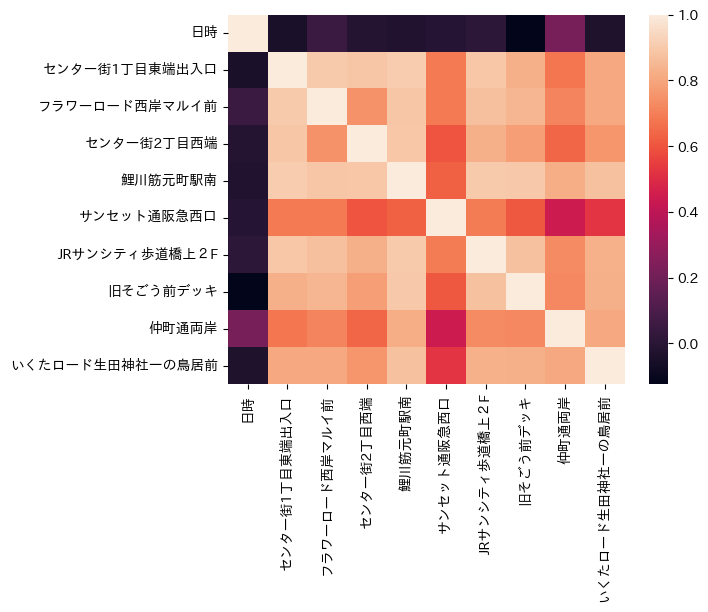

In [14]:
import seaborn as sns
import japanize_matplotlib
sns.heatmap(df_input.corr())
df_input.corr()

In [15]:
df_input.isnull().sum()

日時                    0
センター街1丁目東端出入口       169
フラワーロード西岸マルイ前       408
センター街2丁目西端          217
鯉川筋元町駅南             288
サンセット通阪急西口           98
JRサンシティ歩道橋上２F        24
旧そごう前デッキ            240
仲町通両岸              1221
いくたロード生田神社一の鳥居前      24
dtype: int64

In [16]:
df_input.describe()

,日時,センター街1丁目東端出入口,フラワーロード西岸マルイ前,センター街2丁目西端,鯉川筋元町駅南,サンセット通阪急西口,JRサンシティ歩道橋上２F,旧そごう前デッキ,仲町通両岸,いくたロード生田神社一の鳥居前
count,4944,4775.000000,4536.000000,4727.000000,4656.000000,4846.000000,4920.000000,4704.000000,3723.000000,4920.000000
mean,2020-05-24 05:05:32.038834944,897.998534,1022.042328,730.687117,1591.780713,754.219150,266.260163,519.928359,257.051840,472.349797
min,2020-02-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-03-23 11:45:00,40.000000,146.000000,40.000000,158.000000,190.000000,11.000000,54.000000,17.000000,36.000000
50%,2020-05-13 23:30:00,498.000000,656.000000,350.000000,1127.000000,578.000000,148.000000,276.000000,151.000000,334.000000
75%,2020-07-04 11:15:00,1472.000000,1580.500000,1296.000000,2764.000000,1120.000000,439.000000,812.000000,455.000000,788.500000
max,2020-10-31 23:00:00,4786.000000,5290.000000,4090.000000,7814.000000,4132.000000,1787.000000,3742.000000,2515.000000,2252.000000
std,NaN,1043.031301,1075.255354,841.232246,1561.294201,684.814294,307.979912,610.103069,277.315252,481.119323


<Axes: xlabel='日時', ylabel='JRサンシティ歩道橋上２F'>

E:\venv\ds\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
E:\venv\ds\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  func(*args, **kwargs)
E:\venv\ds\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from current font.
  func(*args, **kwargs)
E:\venv\ds\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
E:\venv\ds\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
E:\venv\ds\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  func(*args, **kwargs)
E:\venv\ds\Lib\site-packages\IPython\core\e

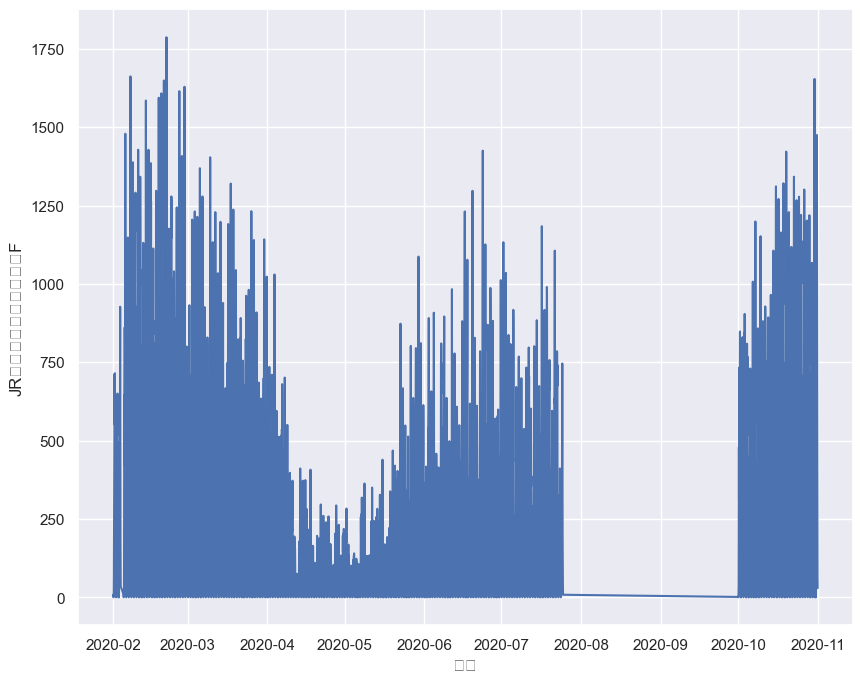

In [17]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.lineplot(x="日時", y="JRサンシティ歩道橋上２F", data=df_input)

In [18]:
!pip install Prophet

In [19]:
from prophet import Prophet
from prophet import plot

Importing plotly failed. Interactive plots will not work.


In [24]:
model = Prophet()
train = df_input.rename(columns={'日時':'ds', 'JRサンシティ歩道橋上２F':'y'})
model.fit(train)

01:51:18 - cmdstanpy - INFO - Chain [1] start processing
01:51:19 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future = model.make_future_dataframe(periods=24, freq='H')
pred = model.predict(future)
pred.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4938,2020-10-31 18:00:00,387.346339,576.236773,974.948878,387.346339,387.346339,386.472978,386.472978,386.472978,392.264191,392.264191,392.264191,-5.791213,-5.791213,-5.791213,0.0,0.0,0.0,773.819317
4939,2020-10-31 19:00:00,387.397941,426.706728,864.655955,387.397941,387.397941,260.640056,260.640056,260.640056,268.023703,268.023703,268.023703,-7.383647,-7.383647,-7.383647,0.0,0.0,0.0,648.037997
4940,2020-10-31 20:00:00,387.449543,241.185257,637.881192,387.449543,387.449543,52.656672,52.656672,52.656672,61.631306,61.631306,61.631306,-8.974634,-8.974634,-8.974634,0.0,0.0,0.0,440.106216
4941,2020-10-31 21:00:00,387.501146,28.609015,450.235485,387.501146,387.501146,-147.721128,-147.721128,-147.721128,-137.163438,-137.163438,-137.163438,-10.557691,-10.557691,-10.557691,0.0,0.0,0.0,239.780018
4942,2020-10-31 22:00:00,387.552748,-79.522802,320.196225,387.552748,387.552748,-263.217430,-263.217430,-263.217430,-251.091145,-251.091145,-251.091145,-12.126286,-12.126286,-12.126286,0.0,0.0,0.0,124.335317
4943,2020-10-31 23:00:00,387.604350,-110.864973,309.522364,387.604350,387.604350,-283.043799,-283.043799,-283.043799,-269.369929,-269.369929,-269.369929,-13.673870,-13.673870,-13.673870,0.0,0.0,0.0,104.560552
4944,2020-11-01 00:00:00,387.655953,-83.617496,320.092970,387.655953,387.655953,-259.193507,-259.193507,-259.193507,-243.999607,-243.999607,-243.999607,-15.193900,-15.193900,-15.193900,0.0,0.0,0.0,128.462446
4945,2020-11-01 01:00:00,387.707555,-57.548650,331.919741,387.707555,387.707555,-252.777017,-252.777017,-252.777017,-236.097146,-236.097146,-236.097146,-16.679871,-16.679871,-16.679871,0.0,0.0,0.0,134.930538
4946,2020-11-01 02:00:00,387.759157,-100.335348,307.821985,387.759157,387.759157,-281.698937,-281.698937,-281.698937,-263.573597,-263.573597,-263.573597,-18.125340,-18.125340,-18.125340,0.0,0.0,0.0,106.060221
4947,2020-11-01 03:00:00,387.810760,-144.593507,279.653764,387.810760,387.810760,-315.008401,-315.008401,-315.008401,-295.484442,-295.484442,-295.484442,-19.523959,-19.523959,-19.523959,0.0,0.0,0.0,72.802359


In [30]:
df_input[df_input['日時'] > datetime.datetime(2020, 11, 1)].head(50)

,日時,センター街1丁目東端出入口,フラワーロード西岸マルイ前,センター街2丁目西端,鯉川筋元町駅南,サンセット通阪急西口,JRサンシティ歩道橋上２F,旧そごう前デッキ,仲町通両岸,いくたロード生田神社一の鳥居前


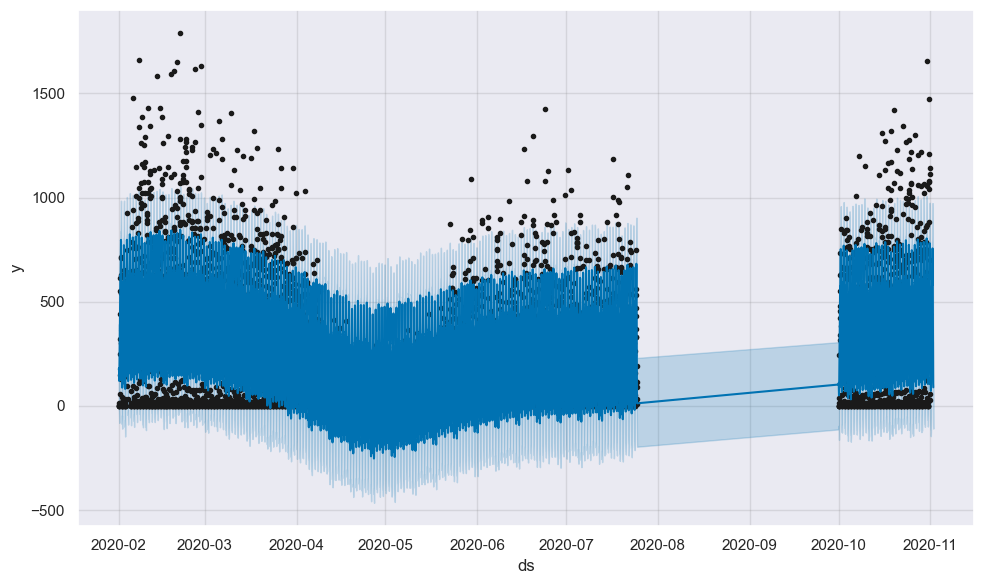

In [26]:
pred_plot = model.plot(pred)

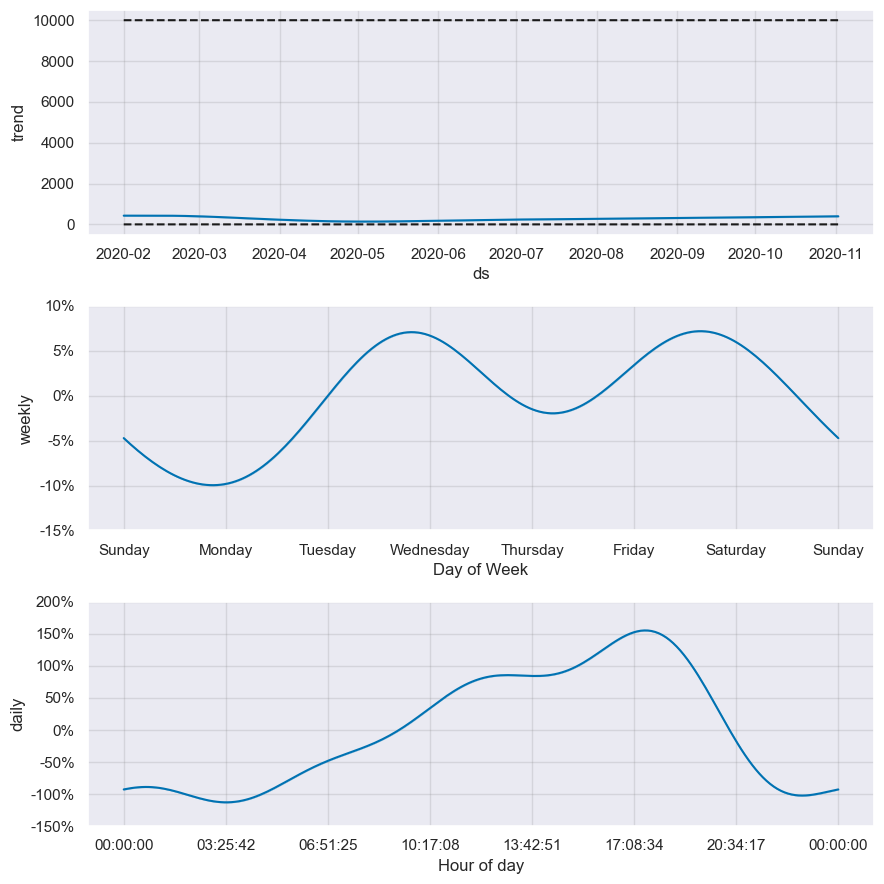

In [23]:
component_plot = model.plot_components(pred)